In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import defaultdict
from IPython.display import display
from scipy import stats


In [3]:
participants = ["04","05", "06", "07", "09", "10", "11", "12"]
conditions =["NoAvatar", "Normal", "Small", "Large"]
questions = {
        
         1: "It felt like the virtual body was my body." ,
         2: "It felt like the virtual body parts were my body parts." ,
         3: "The virtual body felt like a human body." ,
         4 :"It felt like the virtual body belonged to me." ,
        
         5: "The movements of the virtual body felt like they were my movements." ,
         6: "I felt like I was controlling the movements of the virtual body." ,
         7: "I felt like I was causing the movements of the virtual body." ,
         8: "The movements of the virtual body were in sync with my own movements." ,
    
         9: "I felt like the form or appearance of my own body had changed." ,
         10: "I felt like the weight of my own body had changed." ,
         11: "I felt like the size (height) of my own body had changed." ,
         12: "I felt like the width of my own body had changed." ,

    }

In [7]:
data = {}
for c in conditions:
    temp = []    
    for p in participants:
             d = pd.read_csv("C:/Users/LauflaborVR2/GS-MT_Test/Data_pilot/" + p + c + "csv", names= ["Question", "Value"])
             temp.append(d)
    data[c] = temp

In [8]:
small = defaultdict(list)
large =defaultdict(list)
normal = defaultdict(list)
noAvatar = defaultdict(list)
for p in range(len(participants)):
        small["Ownership"].append(data["Small"][p].loc[data["Small"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        small["Agency"].append(data["Small"][p].loc[(data["Small"][p]["Question"] > 4) & (data["Small"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        small["Change"].append(data["Small"][p].loc[data["Small"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        large["Ownership"].append(data["Large"][p].loc[data["Large"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        large["Agency"].append(data["Large"][p].loc[(data["Large"][p]["Question"] > 4) & (data["Large"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        large["Change"].append(data["Large"][p].loc[data["Large"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        normal["Ownership"].append(data["Normal"][p].loc[data["Normal"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        normal["Agency"].append(data["Normal"][p].loc[(data["Normal"][p]["Question"] > 4) & (data["Normal"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        normal["Change"].append(data["Normal"][p].loc[data["Normal"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        noAvatar["Ownership"].append(data["NoAvatar"][p].loc[data["NoAvatar"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        noAvatar["Agency"].append(data["NoAvatar"][p].loc[(data["NoAvatar"][p]["Question"] > 4) & (data["NoAvatar"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        noAvatar["Change"].append(data["NoAvatar"][p].loc[data["NoAvatar"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        

In [9]:
dicts = [noAvatar, normal, small, large ]
keys = small.keys()


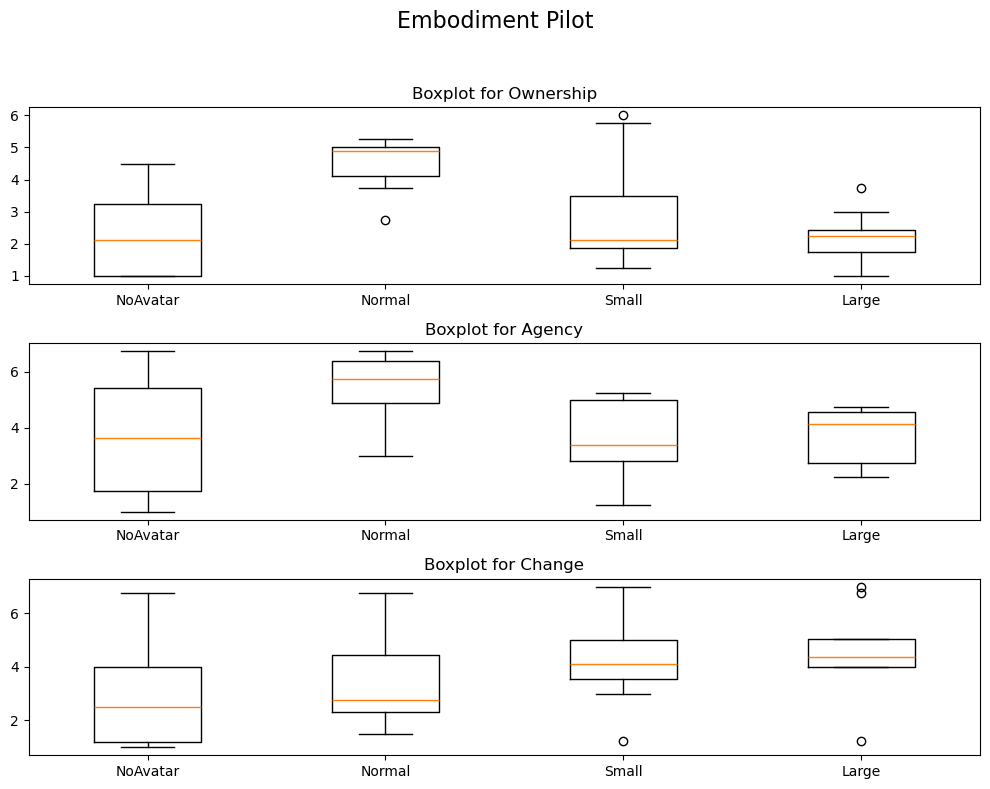

In [9]:
fig, axes = plt.subplots(nrows=len(keys), ncols=1, figsize=(10, 8))
for i, key in enumerate(keys):
    # Collect data for the current key from all defaultdicts
    dat = [d[key] for d in dicts]
    # Flatten the list of lists and add a label for each defaultdict
    data_flat = [item for sublist in dat for item in sublist]
    labels = conditions
    
    # Create a boxplot
    axes[i].boxplot(dat)
    axes[i].set_title(f'Boxplot for {key}')
    axes[i].set_xticklabels([conditions[j] for j in range(len(dicts))])

# Set overall title and show plot
fig.suptitle('Embodiment Pilot', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

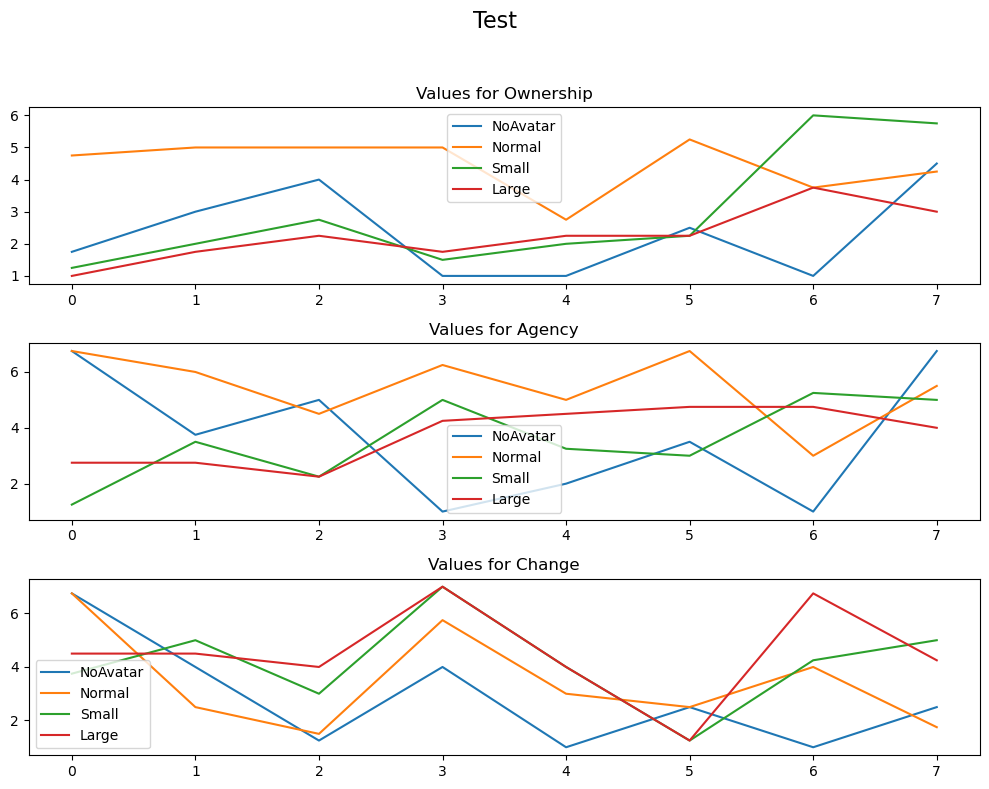

In [10]:
fig, axes = plt.subplots(nrows=len(keys), ncols=1, figsize=(10, 8))
for i, key in enumerate(keys):
    for j, d in enumerate(dicts):
        axes[i].plot(d[key], label=conditions[j])
    
    axes[i].set_title(f'Values for {key}')
    axes[i].legend()

# Set overall title and show plot
fig.suptitle('Test', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

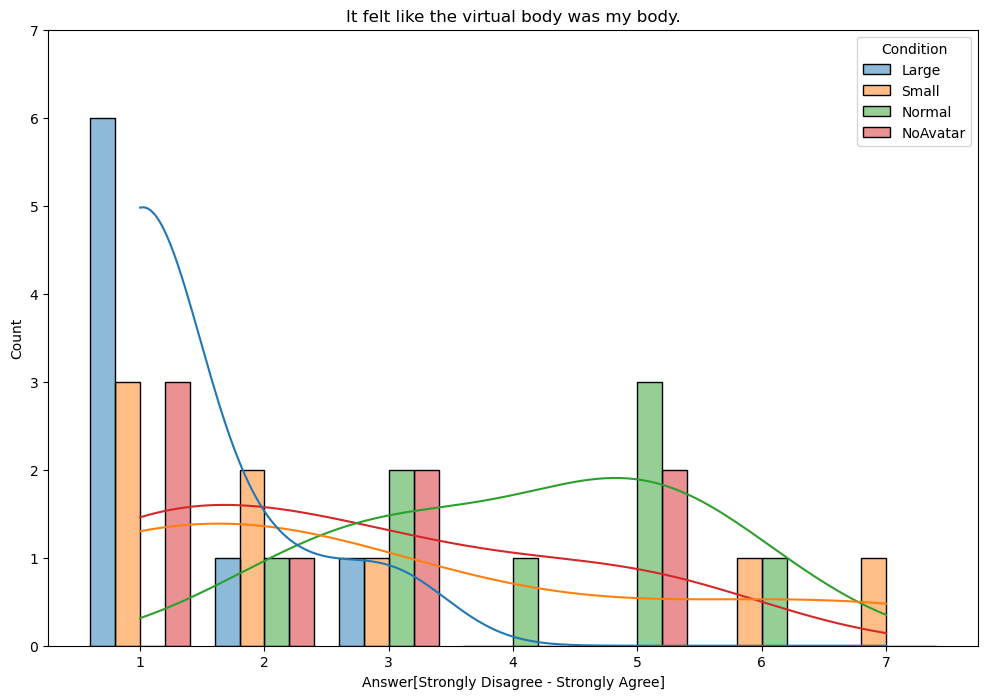

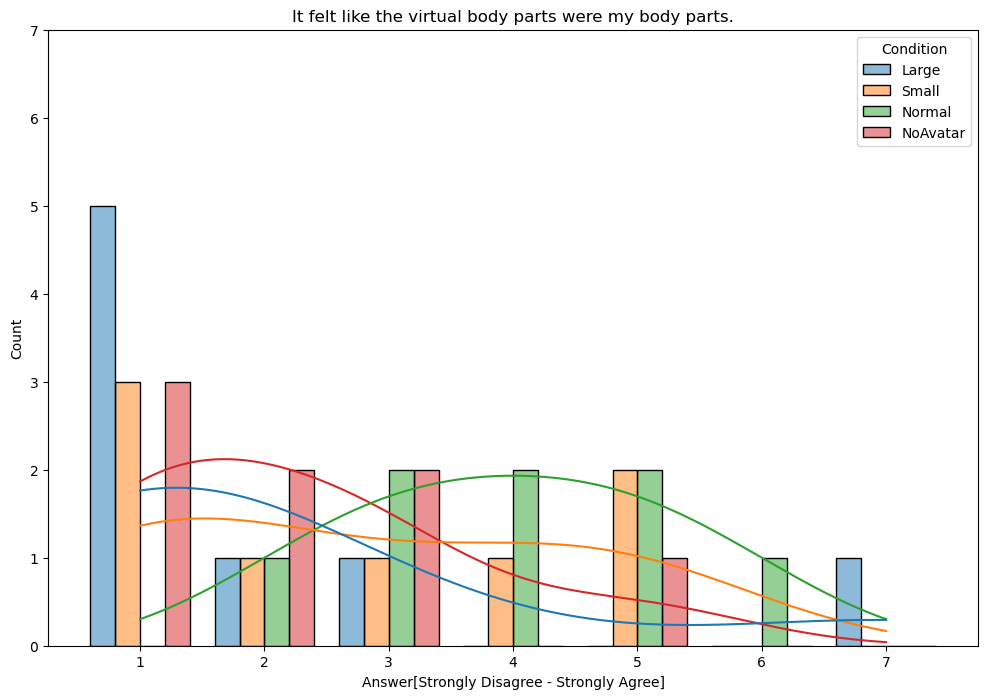

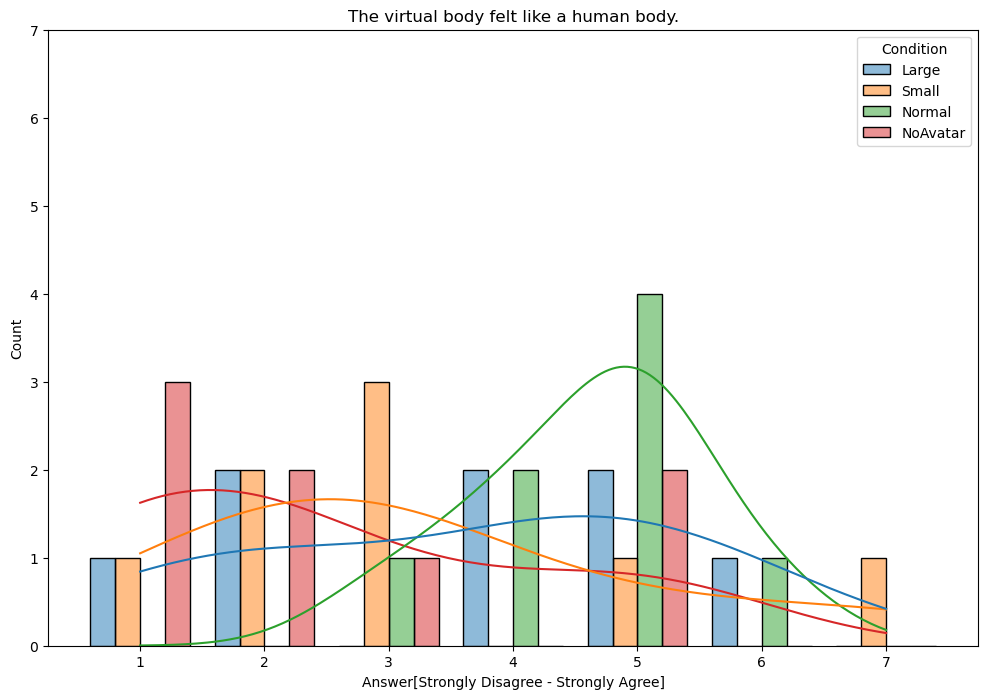

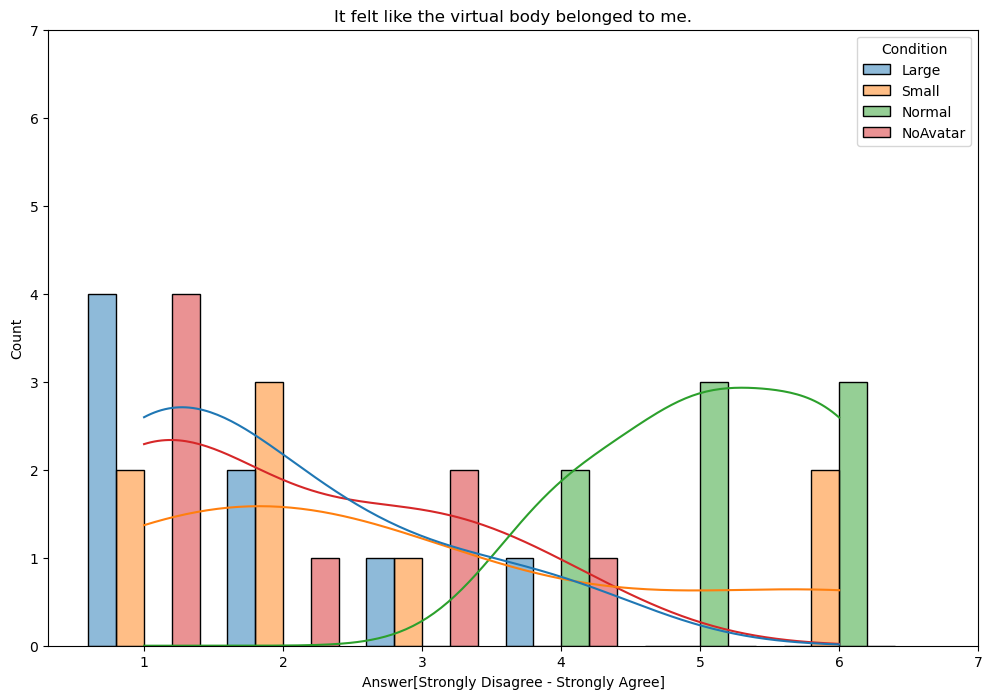

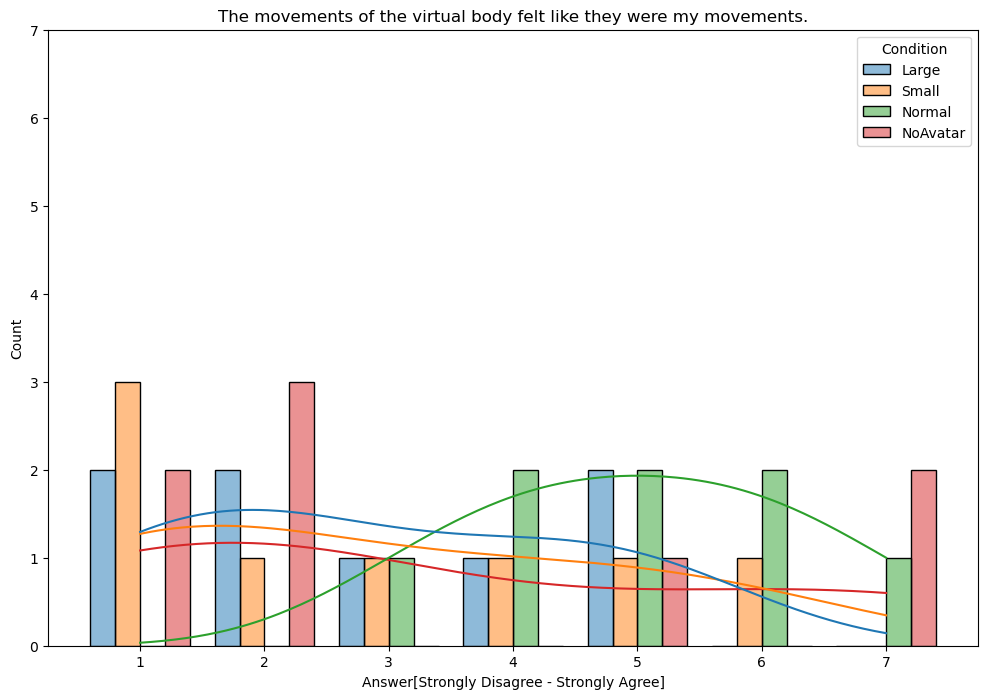

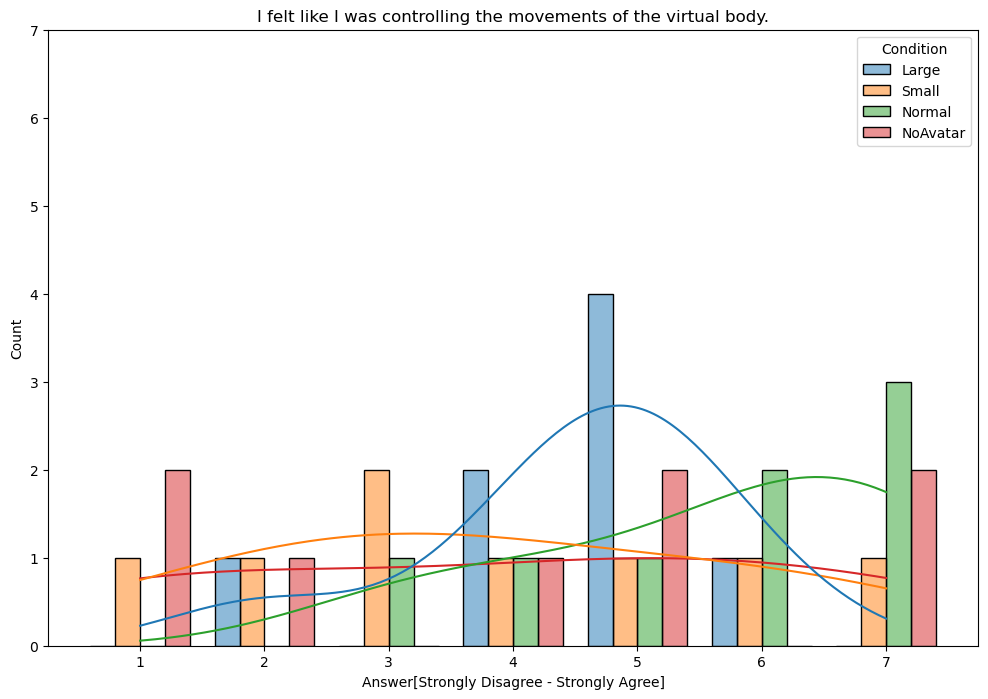

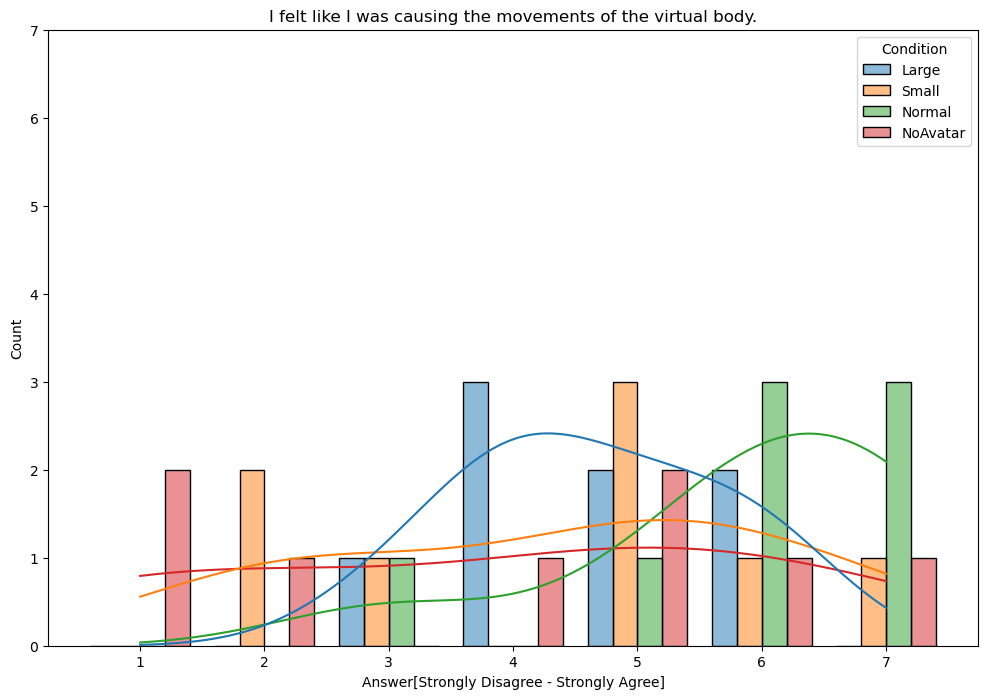

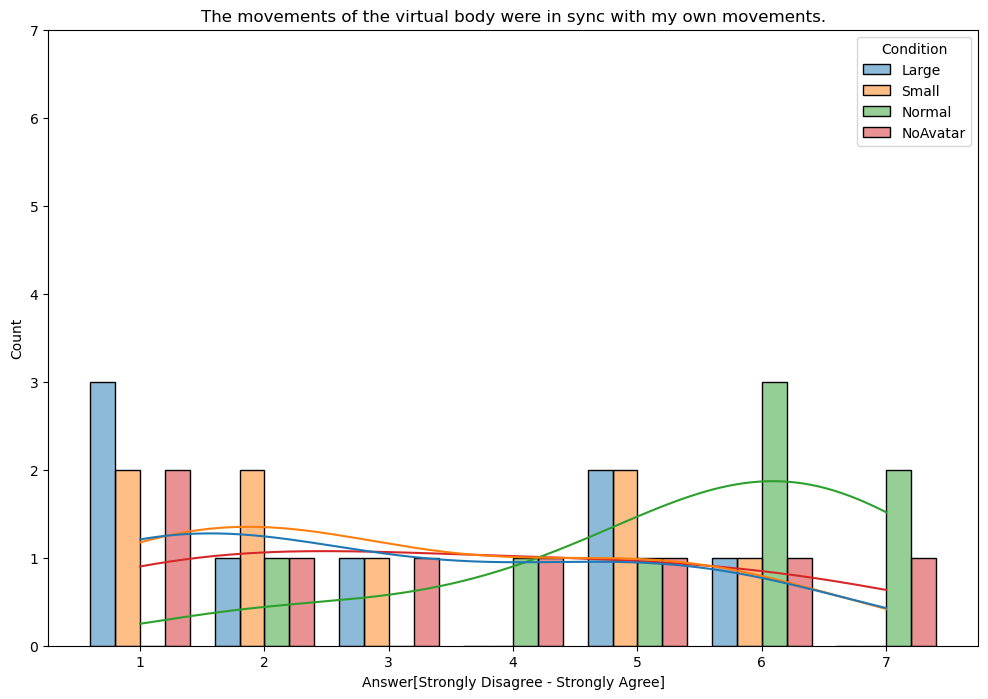

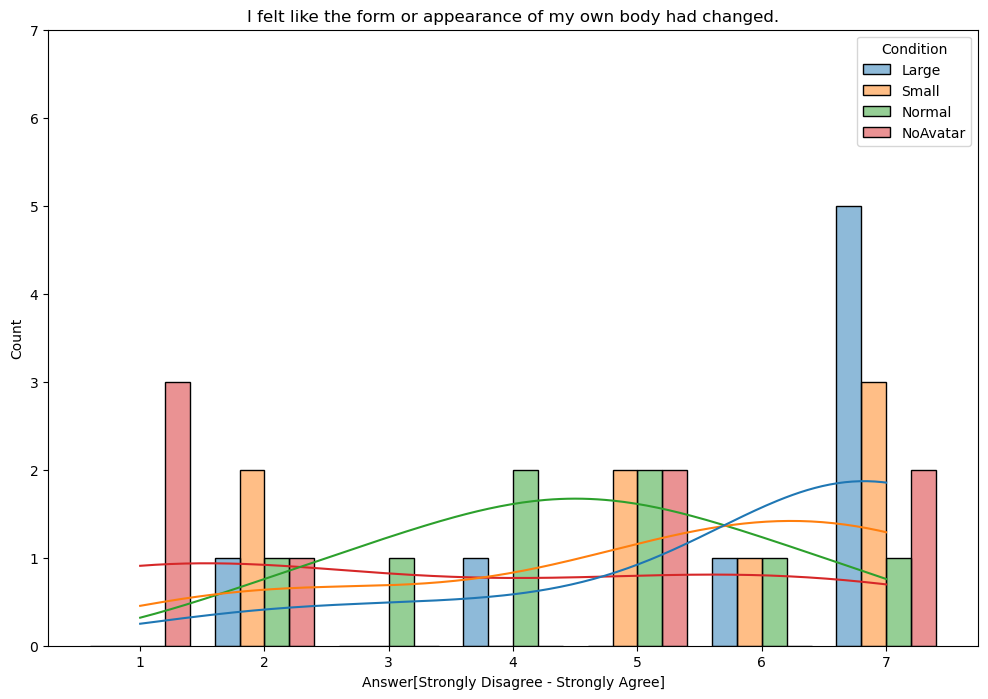

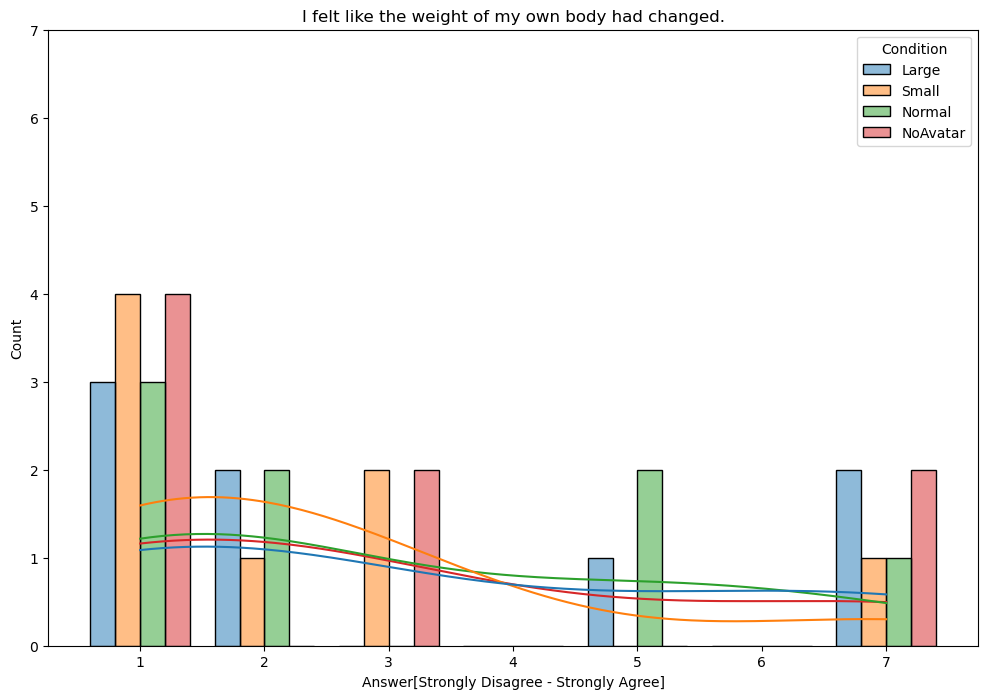

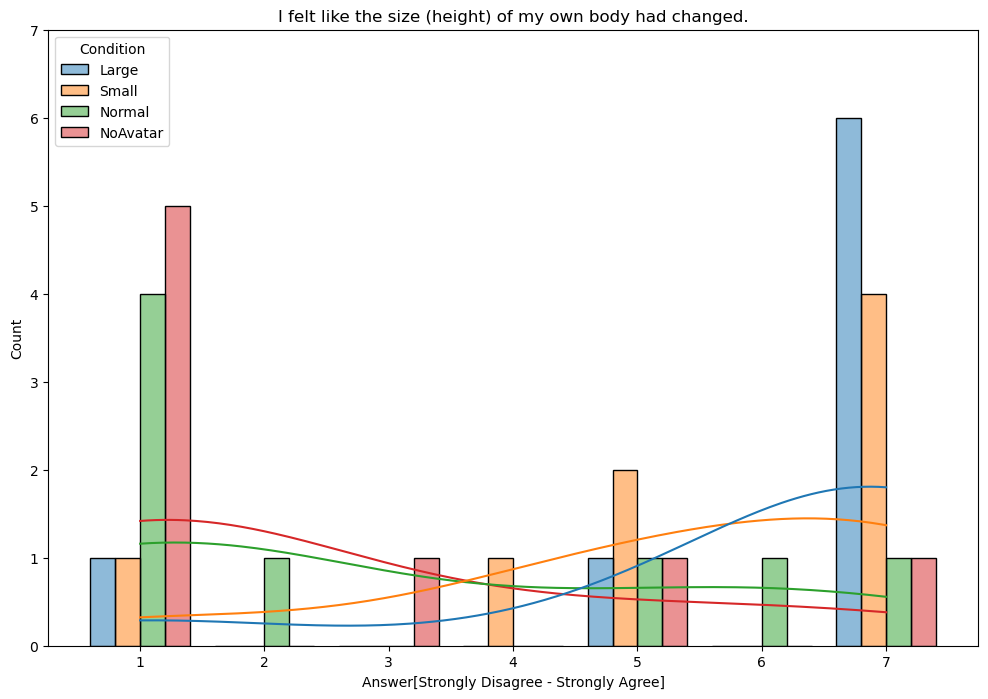

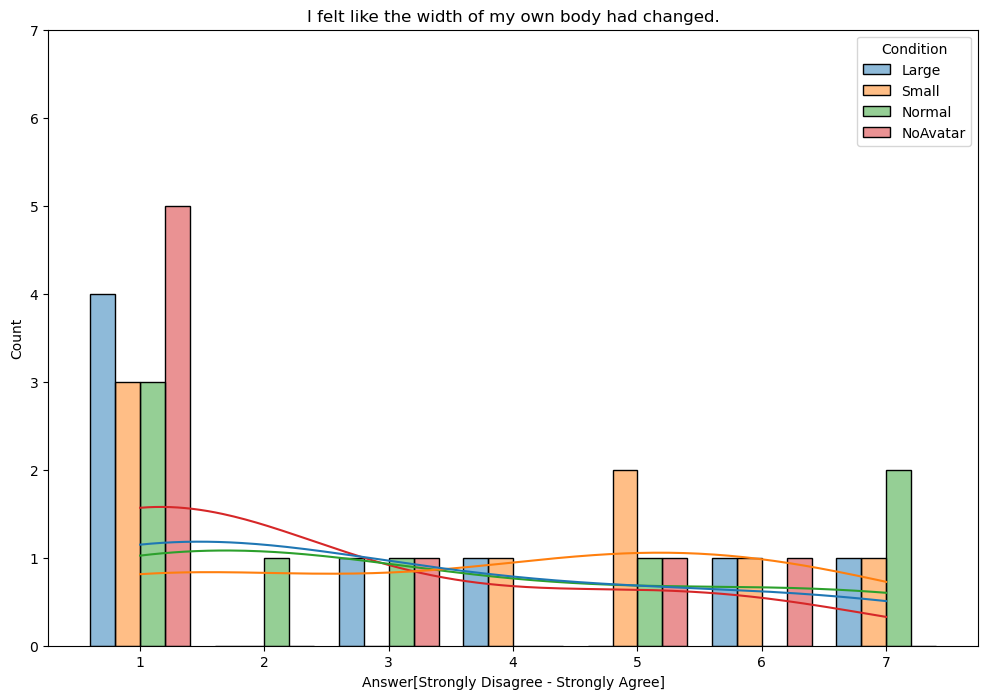

In [36]:
#histogram
consolidated_data = {}
for condition, dfs in data.items():
    consolidated_data[condition] = pd.concat(dfs, ignore_index=True)
    consolidated_data[condition]["Condition"] = condition
consolidated_data

df = pd.concat([consolidated_data["Large"], consolidated_data["Small"], consolidated_data["Normal"], consolidated_data["NoAvatar"]])
# Plot histograms
for q in questions:
    plt.figure(figsize=(12, 8))
    sns.histplot(df.loc[df["Question"]==q], x= "Value", kde=True, stat= "count", discrete= True, label = condition, hue = "Condition" , multiple= "dodge", shrink= .8, line_kws={"scalex" :False})
    plt.title(f'{questions[q]}')
    plt.xlabel('Answer[Strongly Disagree - Strongly Agree]')
    plt.xticks(range(df['Value'].min(), df['Value'].max() + 1))
    
    plt.ylabel('Count')
    plt.yticks(range(0, len(participants)))
    plt.show()

In [7]:
 #anova between all conditions 
stats.f_oneway( consolidated_data["NoAvatar"]["Value"], consolidated_data["Normal"]["Value"], consolidated_data["Small"]["Value"], consolidated_data["Large"]["Value"])
# muss ich mich noch mal reinlesen was hier passend ist

NameError: name 'consolidated_data' is not defined

In [13]:
stats.ttest_ind(consolidated_data["NoAvatar"]["Value"], consolidated_data["Normal"]["Value"])

TtestResult(statistic=-5.146998437372991, pvalue=6.575197978733859e-07, df=190.0)

In [14]:
consolidated_data["NoAvatar"]["Value"]

0     2
1     2
2     2
3     1
4     7
     ..
91    6
92    5
93    1
94    1
95    3
Name: Value, Length: 96, dtype: int64

Presence questionaire

In [10]:
demographic_labels = ["Gender", "Age", "Height", "Weight"]
vr_labels = ["VR Experience","VR Usage","First Person Video Games", "Motion Sickness"]

In [11]:
soci_data = pd.read_csv("C:/Users/LauflaborVR2/GS-MT_Test/Data_pilot/data_vr_walking_with_avatars_2024-07-09_16-00.csv")
soci_data

,VPID,Gender,Age,Height,Weight,VR Experience,VR Usage,First Person Video Games,Motion Sickness,Presence: Somehow I felt that the virtual world surrounded me.,...,Presence: I still paid attention to the real environment.,Presence: I felt present in the virtual space.,Presence: I was not aware of my real environment.,"Presence: I had a sense of acting in the virtual space, rather than operating something from outside.","Presence2: In the computer generated world I had a sense of ""being there"".",Presence 3: I did not feel present in the virtual space.,Presence 4: How real did the virtual world seem to you?,Presence 5: How much did your experience in the virtual environment seem consistent with your real world experience ?,Presence 6: How real did the virtual world seem to you?,"Presence 7: How aware were you of the real world surrounding while navigating in the virtual world? (i.e. sounds, room temperature, other people, etc.)?"
0,2,1,24,180,95,1,3,2,2,5,...,4,6,2,7,5,2,3,3,3,3
1,4,1,20,183,90,1,3,3,3,7,...,6,5,2,5,5,2,5,2,4,4
2,5,1,26,170,70,1,3,2,1,6,...,2,6,5,6,7,2,5,5,3,3
3,6,1,30,185,67,1,3,2,3,5,...,2,5,4,5,5,5,5,4,2,2
4,7,1,22,180,86,1,4,4,3,6,...,5,5,3,5,5,3,4,5,3,3
5,8,1,23,179,72,1,3,1,3,2,...,3,4,3,4,5,3,4,3,4,4
6,9,1,25,172,68,1,4,1,2,7,...,4,6,3,6,6,6,4,5,3,2
7,10,1,20,174,57,1,3,2,2,6,...,4,3,5,6,5,3,3,3,6,2
8,11,1,23,184,87,2,4,3,3,6,...,2,6,5,3,6,3,5,3,2,4
9,12,1,25,185,81,2,4,1,3,4,...,6,5,6,7,4,7,3,6,3,1


In [12]:
#inverted 
def invert(d):
    return 8-d

In [13]:
demo_data = soci_data[demographic_labels]
vr_data = soci_data[vr_labels]
ipq_data = soci_data.drop(demographic_labels + vr_labels, axis= 1)


In [14]:
numeric_summary = demo_data.describe().loc[["mean", "std"]]
categorical_summary = demo_data.select_dtypes(include=['object']).apply(pd.Series.value_counts)
display(numeric_summary)
display(categorical_summary)
ipq_per_question = ipq_data.describe().loc[["mean", "std"]]
display(ipq_per_question)




,Gender,Age,Height,Weight
mean,1.0,24.727273,179.363636,77.727273
std,0.0,4.173510,5.220589,11.679819


""
0
1
2
3
4
5
6
7
8
9


,VPID,Presence: Somehow I felt that the virtual world surrounded me.,Presence: I felt like I was just perceiving pictures.,Presence: I was completely captivated by the virtual world.,Presence: The virtual world seemed more realistic than the real world.,Presence: I still paid attention to the real environment.,Presence: I felt present in the virtual space.,Presence: I was not aware of my real environment.,"Presence: I had a sense of acting in the virtual space, rather than operating something from outside.","Presence2: In the computer generated world I had a sense of ""being there"".",Presence 3: I did not feel present in the virtual space.,Presence 4: How real did the virtual world seem to you?,Presence 5: How much did your experience in the virtual environment seem consistent with your real world experience ?,Presence 6: How real did the virtual world seem to you?,"Presence 7: How aware were you of the real world surrounding while navigating in the virtual world? (i.e. sounds, room temperature, other people, etc.)?"
mean,7.909091,5.454545,2.818182,3.454545,1.272727,3.636364,5.090909,3.727273,4.818182,5.272727,3.727273,4.090909,3.909091,3.272727,2.818182
std,3.477198,1.439697,1.537412,4.297991,0.467099,1.566699,0.943880,1.348400,2.272364,0.786245,1.737292,0.831209,1.221028,1.103713,0.981650


In [15]:
#remove the question with a reversed scale
ipq11 = ipq_data.drop( "VPID", axis=1)
ipq11[["Presence 6: How real did the virtual world seem to you?","Presence 7: How aware were you of the real world surrounding while navigating in the virtual world? (i.e. sounds, room temperature, other people, etc.)?" ]] =ipq11[["Presence 6: How real did the virtual world seem to you?","Presence 7: How aware were you of the real world surrounding while navigating in the virtual world? (i.e. sounds, room temperature, other people, etc.)?" ]].map(invert)
display(ipq11.describe().loc[["mean", "std"]].mean(axis=1))

mean    4.084416
std     1.466763
dtype: float64

In [17]:
heights = soci_data["Height"]
weights = soci_data["Weight"]
weights.to_csv("weights.csv", index= False)
heights.to_csv("heights.csv", index= False)
weights

0     95
1     90
2     70
3     67
4     86
5     72
6     68
7     57
8     87
9     81
10    82
Name: Weight, dtype: int64